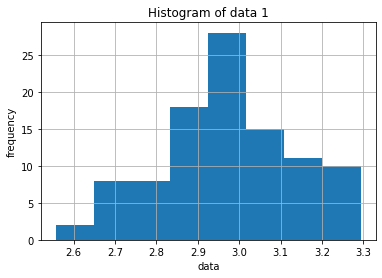

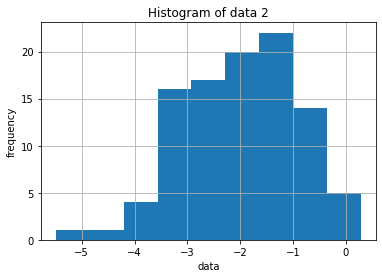

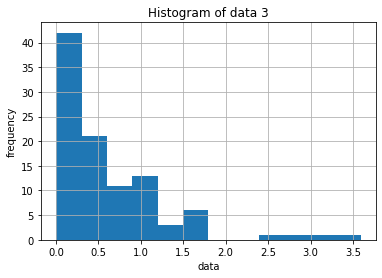

Estimated to be Gaussian!
Estimated to be Gaussian!
Estimated to be exponential!
Data 1 : [2.9699190297113724, 0.025866716386731166]
Data2: [-2.001669510442359, 1.1816733596277185]
Data 3: [1.6237209611241854]



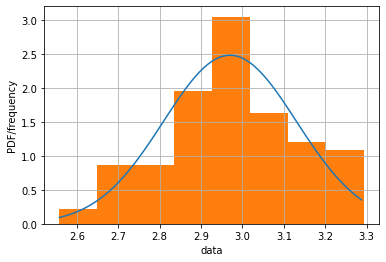

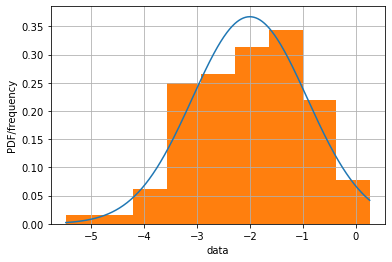

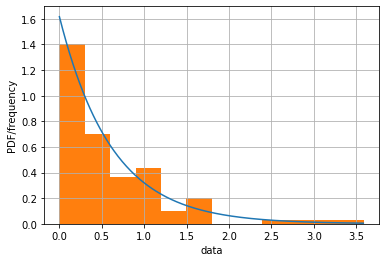

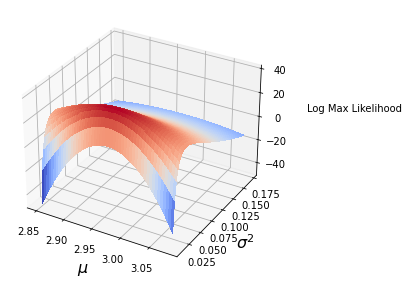

numerical mu: [2.9987]
numerical var: [0.02299]


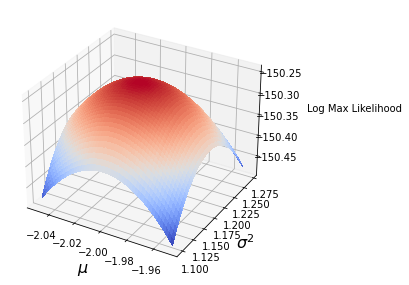

numerical mu: [-1.9683]
numerical var: [1.1483]


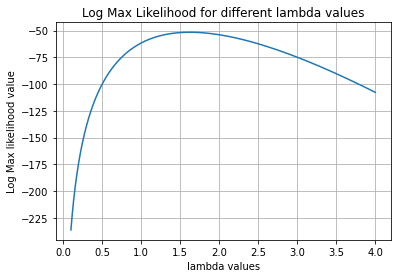

Numerical computed lambda value: 1.6237000000000437

Posterior mu: [2.96928031]
Posterior var: [0.0002586]

Posterior mu: [-1.97245319]
Posterior var: [0.01167873]



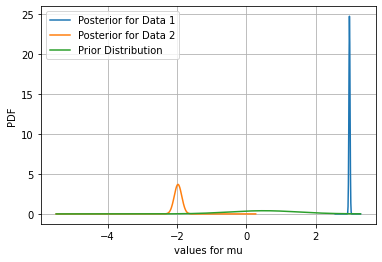

<Figure size 432x288 with 0 Axes>

In [13]:
%run HW1_MLE_skeleton.py

In [1]:

if 0:
    %matplotlib qt
    from matplotlib import interactive
    interactive(True)
    print("d")
else:
    #%matplotlib widget
    %matplotlib inline
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.stats as stats


    # Load the three data arrays (100 x 1 - arrays)
data1 = np.loadtxt('HW1_MLE_1.data')
data2 = np.loadtxt('HW1_MLE_2.data')
data3 = np.loadtxt('HW1_MLE_3.data')

In [3]:
data1_d = (10*data3).astype(int)
tmp_mean = stats.mode(data1_d)
tmp_mean = tmp_mean[0]/10
(data1 <= tmp_mean).sum() / len(data3)
data2

array([-0.7579395 , -1.72960669, -0.74547553, -3.44182213, -0.67414508,
       -1.37916482, -0.90212941, -2.52063258, -1.42372788, -3.19252335,
       -0.62157742, -1.6442743 , -1.3133619 , -1.71414384, -3.04257366,
       -1.51172042, -3.3267773 , -2.33784588, -3.31719909, -2.05802504,
       -3.31997064, -1.69107901, -2.71960642, -0.93452869, -3.46665823,
       -2.42268463, -3.36375898, -0.52660506, -1.05014229, -1.97563312,
       -3.0918238 , -2.87653103, -3.41871296,  0.27602863, -1.67396196,
       -2.91918171, -1.36069712, -1.58999048, -2.09256291, -1.16802901,
       -1.28051498, -3.37899735, -0.85284477, -2.35575295, -2.48265571,
       -1.35232444, -1.70630702, -5.48357054, -3.68460477, -1.71008895,
       -4.05477325, -1.50087877, -1.51524659, -2.48848328, -1.52299193,
       -1.89350781, -2.10576731, -4.60927338, -0.26455986, -2.53093077,
       -1.0235121 , -1.23924019, -1.60854376, -0.3816165 , -2.51411619,
       -3.17200584, -0.8814249 , -1.85508267, -1.08249805, -1.21

In [13]:
data = data1
data_d = np.digitize(data, np.linspace(min(data), max(data), num=10))
print(np.mean(data_d))

data_d



5.56


array([ 6,  5,  2,  5,  5,  5,  4,  4,  4,  1,  5,  5,  5,  4,  5,  6,  6,
        5,  3,  3,  1,  7,  5,  4,  2,  5,  7,  7,  2,  2,  9,  7,  4,  6,
        4,  8, 10,  5,  5,  5,  9,  3,  6,  9,  6,  7,  5,  7,  5,  4,  6,
        3,  8,  9,  8,  5,  8,  4,  7,  8,  4,  6,  9,  6,  5,  9,  3,  4,
        4,  6,  9,  7,  8,  7,  5,  6,  5,  9,  5,  6,  5,  6,  8,  6,  7,
        5,  5,  6,  6,  2,  7,  6,  7,  3,  7,  4,  6,  7,  3,  7],
      dtype=int64)

(15900, 2300)
(array([1487], dtype=int64), array([1199], dtype=int64))


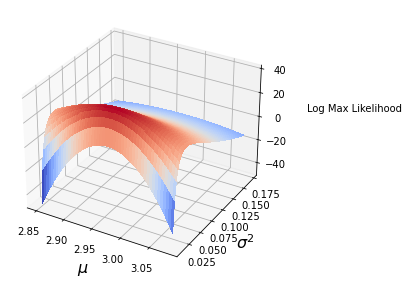

In [4]:
data=data1
mu_min = 2.85
mu_max = 3.08
sigma_sq_min = 0.011
sigma_sq_max = 0.17
resolution_mu = 0.0001
resolution_sigma_sq = 0.00001


mu_arr = np.arange(mu_min,mu_max,resolution_mu)
var_arr = np.arange(sigma_sq_min,sigma_sq_max,resolution_sigma_sq)
mu_array,var_array = np.meshgrid(mu_arr,var_arr)

data_len = len(data)

sum_array = []
for tmp_mu in mu_array[1,0:]:
    sum_array.append(np.sum((data-tmp_mu)**2))
sum_arr=np.tile(sum_array,(len(var_arr),1))

ML_val = data_len * np.log(1) - data_len / 2 * np.log(2 * np.pi * var_array) - 1 / 2 * np.divide(sum_arr,var_array)
#ML_val = np.log(1/(np.sqrt(2*np.pi*var_array)))-sum_array/(var_array)




ax = plt.figure().add_subplot(projection='3d')

surf = ax.plot_surface(mu_array, var_array, ML_val, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.yaxis.set_scale('log')
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)

ax.xaxis.labelpad=6
ax.yaxis.labelpad=4
ax.zaxis.labelpad=39
ax.set_xlabel("$\mu$",fontsize=16, rotation=0)
ax.set_ylabel("$\sigma^2$",fontsize=16, rotation=0)
ax.set_zlabel("Log Max Likelihood",rotation=0)
#ax.azim = 225
plt.tight_layout()
ML_val.argmax()
print(np.shape(ML_val))
a = ML_val
print(np.where(a==a.max()))
plt.savefig("data1_3d_close.pdf",bbox_inches="tight")
#var_arr[2447]

(1700, 1000)
(array([817], dtype=int64), array([483], dtype=int64))


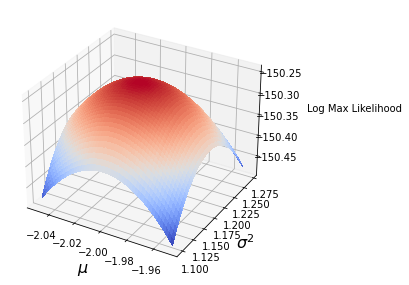

In [286]:
data=data2
mu_min = -2.05
mu_max = -1.95
sigma_sq_min = 1.1
sigma_sq_max = 1.27
resolution_mu = 0.0001
resolution_sigma_sq = 0.0001


mu_arr = np.arange(mu_min,mu_max,resolution_mu)
var_arr = np.arange(sigma_sq_min,sigma_sq_max,resolution_sigma_sq)
mu_array,var_array = np.meshgrid(mu_arr,var_arr)

data_len = len(data)

sum_array = []
for tmp_mu in mu_array[1,0:]:
    sum_array.append(np.sum((data-tmp_mu)**2))
sum_arr=np.tile(sum_array,(len(var_arr),1))

ML_val = data_len * np.log(1) - data_len / 2 * np.log(2 * np.pi * var_array) - 1 / 2 * np.divide(sum_arr,var_array)
#ML_val = np.log(1/(np.sqrt(2*np.pi*var_array)))-sum_array/(var_array)




ax = plt.figure().add_subplot(projection='3d')

surf = ax.plot_surface(mu_array, var_array, ML_val, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.yaxis.set_scale('log')
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)

ax.xaxis.labelpad=6
ax.yaxis.labelpad=4
ax.zaxis.labelpad=39
ax.set_xlabel("$\mu$",fontsize=16, rotation=0)
ax.set_ylabel("$\sigma^2$",fontsize=16, rotation=0)
ax.set_zlabel("Log Max Likelihood",rotation=0)
#ax.azim = 225
plt.tight_layout()
ML_val.argmax()
print(np.shape(ML_val))
a = ML_val
print(np.where(a==a.max()))
plt.savefig("data2_3d.pdf",bbox_inches="tight")


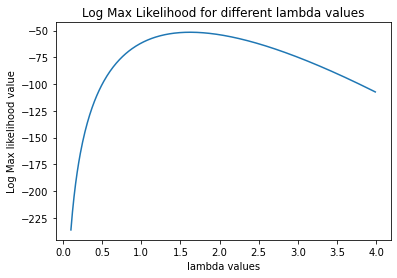

In [20]:
data = data3
data_len= len(data)
lambda_min = 0.1
lambda_max = 2
resolution_lambda = 0.01

lambda_array = np.arange(lambda_min,lambda_max,resolution_lambda)

ML_val = data_len* np.log(lambda_array) - lambda_array * sum(data)

plt.plot(lambda_array,ML_val)
plt.title("Log Max Likelihood for different lambda values")
plt.xlabel("lambda values")
plt.ylabel("Log Max likelihood value")
plt.show()

1.6199999999999992

In [2]:


# Load the three data arrays (100 x 1 - arrays)
data1 = np.loadtxt('HW1_MLE_1.data')
data2 = np.loadtxt('HW1_MLE_2.data')
data3 = np.loadtxt('HW1_MLE_3.data')


# 2.1 Maximum Likelihood Model Estimation (MLE)
# ---------------------------------------------



# Estimate the true model parameters via MLE
ML_param_1 = ML_estimation(data1)
ML_param_2 = ML_estimation(data2)
ML_param_3 = ML_estimation(data3)

print(f"Data 1 : {ML_param_1} \n Data2: {ML_param_2} \n Data 3: {ML_param_3} ")

fig4 = plt.figure("Figure 2")
x_axis = np.arange(min(data1),max(data1),0.01)
plt.plot(x_axis,stats.norm.pdf(x_axis,ML_param_1[0],np.sqrt(ML_param_1[1])))
plt.hist(data1,density=True,bins="auto")
plt.xlabel("data")
plt.ylabel("PDF/frequency")
plt.title("Histogram of data 1 with corresponding PDF")
plt.grid(color='g', linestyle='-', linewidth=1)

plt.show()

fig5 = plt.figure("Figure 2")
x_axis = np.arange(min(data2),max(data2),0.01)
plt.plot(x_axis,stats.norm.pdf(x_axis,ML_param_2[0],np.sqrt(ML_param_2[1])))
plt.hist(data2,density=True,bins="auto")
plt.xlabel("data")
plt.ylabel("PDF/frequency")
plt.grid()
plt.show()

fig6 = plt.figure("Figure 2")
x_axis = np.arange(min(data3),max(data3),0.01)
plt.plot(x_axis,ML_param_3[0]*np.exp(-1*ML_param_3[0]*x_axis))
plt.hist(data3,density=True,bins="auto")
plt.xlabel("data")
plt.ylabel("PDF/frequency")    
plt.grid()
plt.show()



datai = data1
dataj = data2
datak = data3

#gauss values
mu_min = -6
mu_max = 6
sigma_sq_min = 0.01
sigma_sq_max = 1.5
resolution_mu = 0.1
resolution_sigma_sq = 0.1

#exp values
lambda_min=0.1
lambda_max=4
resolution_lambda = 0.01

# 2.2 Evaluation and Visualization of the Likelihood Function
# -----------------------------------------------------------

# 3D plots of the joint likelihood functions of the Gaussian distributed data
plot_likelihood_Gauss(datai,mu_min,mu_max,sigma_sq_min,sigma_sq_max,resolution_mu,resolution_sigma_sq)
plot_likelihood_Gauss(dataj,mu_min,mu_max,sigma_sq_min,sigma_sq_max,resolution_mu,resolution_sigma_sq) 

# Numerical MLE for the Gaussian distributed data
ML_num_i = ML_numerical_Gauss(datai,mu_min,mu_max,sigma_sq_min,sigma_sq_max,resolution_mu,resolution_sigma_sq)
ML_num_j = ML_numerical_Gauss(dataj,mu_min,mu_max,sigma_sq_min,sigma_sq_max,resolution_mu,resolution_sigma_sq)

# 2D plot of the joint likelihood function of exponential distributed data
plot_likelihood_Exp(datak,lambda_min,lambda_max,resolution_lambda) 

# Numerical MLE for the exponential distributed data
ML_num_k = ML_numerical_Exp(datak,lambda_min,lambda_max,resolution_lambda)


# 2.3 Bayesian Model Estimation
# -----------------------------


mu_prior = 0.5
sigma_sq_prior = 1


mu_ML = ML_param_1[0]
sigma_sq_true = ML_param_1[1]
posterior_param_i = posterior_mean_Gauss(datai,mu_prior,mu_ML,sigma_sq_prior,sigma_sq_true)

mu_ML = ML_param_2[0]
sigma_sq_true = ML_param_2[1]
posterior_param_j = posterior_mean_Gauss(dataj,mu_prior,mu_ML,sigma_sq_prior,sigma_sq_true)

fig7 = plt.figure("Figure 2")

x_axis_1 = np.arange(min(data1),max(data1),0.01)
x_axis_2 = np.arange(min(data2),max(data2),0.01)
x_axis_prior = np.arange(min(np.append(data1,data2)),max(np.append(data1,data2)),0.01)

plt.plot(x_axis_1,stats.norm.pdf(x_axis_1,posterior_param_i[0],np.sqrt(posterior_param_i[1])))

plt.plot(x_axis_2,stats.norm.pdf(x_axis_2,posterior_param_j[0],np.sqrt(posterior_param_j[1])))

plt.plot(x_axis_prior,stats.norm.pdf(x_axis_prior,mu_prior,np.sqrt(sigma_sq_prior)))
plt.legend(["Posterior for Data 1","Posterior for Data 2","Prior Distribution"])
plt.xlabel("values for mu")
plt.ylabel("PDF")
plt.grid()
plt.show()



#--------------------------------------------------------------------------------
# Helper Functions (to be implemented!)
#--------------------------------------------------------------------------------


def ML_estimation(data):
    
    """ estimates the maximum likelihood parameters for a given data sample.
    
    Input:  data ... an array of 1-dimensional data points
    
    Output: ML_param ... the values of the maximum likelihood estimators for all parameters
                         of the corresponding distribution (i.e., 1-D Gaussian or 1-D exponential)
    """
    
    tolerance = 1
    data_d = np.digitize(data, np.linspace(min(data), max(data), num=10))
    data_len = len(data)
    
    if abs(np.mean(data_d) - 5) < tolerance:
        #GAUSS
        print("Gaussian")
        mu_tilde = 1/data_len * np.sum(data)
        var_tilde = 1/data_len * np.sum((data-mu_tilde)**2)
        ML_param = [mu_tilde,var_tilde]
    
    else:
        #EXPON
        print("exponential")
        lambda_tilde = data_len / (np.sum(data))
        ML_param = [lambda_tilde]
        
    return ML_param
                                                                                                                  


#--------------------------------------------------------------------------------

def plot_likelihood_Gauss(data,mu_min,mu_max,sigma_sq_min,sigma_sq_max,resolution_mu,resolution_sigma_sq):
    
    """ Plots the joint likelihood function for mu and sigma^2 for a given 1-D Gaussian data sample on
        a predefined grid.
    
    Input:  data ... an array of 1-dimensional Gaussian distributed data points
            mu_min ... lower boundary of the grid on the mu-axis
            mu_max ... upper boundary of the grid on the mu-axis
            sigma_sq_min ... lower boundary of the grid on the sigma^2-axis
            sigma_sq_max ... upper boundary of the grid on the sigma^2-axis
            resolution_mu ... interval length between discretized points on the mu-axis
            
            resolution_sigma_sq ... interval length between discretized points on the sigma^2-axis
    Output: ---
    """
    
    # TODO Plot the joint Gaussian likelihood w.r.t. mu and sigma^2 on a discretized 2-D grid
        
    mu_arr = np.arange(mu_min,mu_max,resolution_mu)
    var_arr = np.arange(sigma_sq_min,sigma_sq_max,resolution_sigma_sq)
    mu_array,var_array = np.meshgrid(mu_arr,var_arr)

    data_len = len(data)

    sum_array = []
    for tmp_mu in mu_array[1,0:]:
        sum_array.append(np.sum((data-tmp_mu)**2))
    sum_arr=np.tile(sum_array,(len(var_arr),1))

    ML_val = data_len * np.log(1) - data_len / 2 * np.log(2 * np.pi * var_array) - 1 / 2 * np.divide(sum_arr,var_array)
    fig = plt.figure("Figure 2")
    ax = fig.add_subplot(projection='3d')

    ax.plot_surface(mu_array, var_array, ML_val, cmap=cm.coolwarm,
                     linewidth=0, antialiased=False)
    plt.grid()
    plt.show()
    return

#--------------------------------------------------------------------------------

def ML_numerical_Gauss(data,mu_min,mu_max,sigma_sq_min,sigma_sq_max,resolution_mu,resolution_sigma_sq):
    
    """ numerically computes the MLEs for mu and sigma^2 for a given 1-D Gaussian data sample on
        a predefined grid.
    
    Input:  data ... an array of 1-dimensional Gaussian distributed data points
            mu_min ... lower boundary of the grid on the mu-axis
            mu_max ... upper boundary of the grid on the mu-axis
            sigma_sq_min ... lower boundary of the grid on the sigma^2-axis
            sigma_sq_max ... upper boundary of the grid on the sigma^2-axis
            resolution_mu ... interval length between discretized points on the mu-axis
            resolution_sigma_sq ... interval length between discretized points on the sigma^2-axis
            
    Output: ML_num_Gauss ... the numerical maximum likelihood estimators for mu and sigma^2 for a Gaussian data
                       array
    """
    
    ML_num_Gauss = np.zeros([2,1])
    
    # TODO Compute the values of the joint Gaussian likelihood w.r.t. (mu,sigma^2) and the data on a discretized 2-D grid
    #      and take the maximizing argument (mu*,sigma^2*) as the numerical MLE.
    
    return ML_num_Gauss
    
#--------------------------------------------------------------------------------

def plot_likelihood_Exp(data,lambda_min,lambda_max,resolution_lambda):
    
    """ Plots the joint likelihood function for lambda for a given 1-D exponentially distributed data sample on
        a predefined grid.
    
    Input:  data ... an array of 1-dimensional Gaussian distributed data points
            lambda_min ... lower boundary of the grid on the lambda-axis
            lambda_max ... upper boundary of the grid on the lambda-axis
            resolution_lambda ... interval length between discretized points on the lambda-axis
            
    Output: ---
    """
    
    lambda_array = np.arange(lambda_min,lambda_max,resolution_lambda)
    data_len = len(data)
    ML_val = data_len* np.log(lambda_array) - lambda_array * sum(data)

    plt.plot(lambda_array,ML_val)
    plt.title("Log Max Likelihood for different lambda values")
    plt.xlabel("lambda values")
    plt.ylabel("Log Max likelihood value")
    plt.grid()
    plt.show()
    return

#--------------------------------------------------------------------------------

def ML_numerical_Exp(data,lambda_min,lambda_max,resolution_lambda):
    
    """ numerically computes the MLEs for lambda for a given 1-D exponentially distributed data sample on
        a predefined grid.
    
    Input:  data ... an array of 1-dimensional exponentially distributed data points
            lambda_min ... lower boundary of the grid on the lambda-axis
            lambda_max ... upper boundary of the grid on the lambda-axis
            resolution_lambda ... interval length between discretized points on the lambda-axis
            
    Output: ML_num_Exp ... the numerical maximum likelihood estimators for mu and sigma^2 for a Gaussian data
                       array
    """
    
    ML_num_Exp = np.zeros([1,1])
    
    lambda_array = np.arange(lambda_min,lambda_max,resolution_lambda)
    data_len = len(data)
    ML_val = data_len* np.log(lambda_array) - lambda_array * sum(data)

    # TODO Compute the values of the joint exponential likelihood w.r.t. lambda and the data on a discretized 1-D grid
    #      and take the maximizing argument lambda* as the numerical MLE.
    ML_num_Exp = lambda_array[np.argmax(ML_val)]
    print(f"Numerical computed lambda value: {ML_num_Exp}")
    return ML_num_Exp
    
#--------------------------------------------------------------------------------

def posterior_mean_Gauss(data,mu_prior,mu_ML,sigma_sq_prior,sigma_sq_true):
    
    """ computes the parameters of the posterior distribution for the mean with a Gaussian prior and a Gaussian likelihood
    
    Input:  data ... an array of 1-dimensional Gaussian distributed data points
            mu_prior ... mean of the prior distribution of mu
            mu_ML ... maximum likelihood estimator of mu w.r.t. a certain data array
            sigma_sq_prior ... variance of the prior distribution of mu
            sigma_sq_true ... true variance of the distribution that underlies a certain data array   
            
    Output: posterior_param_Gauss ... the parameters of a posterior Gaussian distribution for the mean
    """
    
    posterior_param_Gauss = np.zeros([2,1])
    


    data_len = len(data)

    posterior_param_Gauss[0] = (sigma_sq_true *mu_prior + data_len*sigma_sq_prior*mu_ML)/(data_len*sigma_sq_prior + sigma_sq_true)

    posterior_param_Gauss[1] = 1/(1/sigma_sq_prior + data_len/sigma_sq_true)
    print(f"Posterior mu: { posterior_param_Gauss[0]}\n Posterior var: { posterior_param_Gauss[1]}")
    
    return posterior_param_Gauss
   
#--------------------------------------------------------------------------------
    
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
if __name__ == '__main__':
    main()
    


NameError: name 'ML_estimation' is not defined

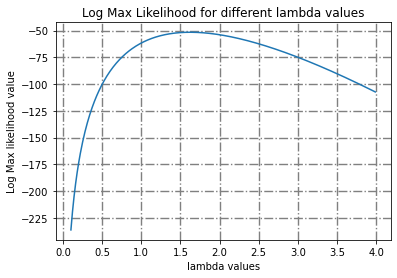

In [57]:
    data=data3
    lambda_array = np.arange(lambda_min,lambda_max,resolution_lambda)
    data_len = len(data)
    ML_val = data_len* np.log(lambda_array) - lambda_array * sum(data)

    plt.plot(lambda_array,ML_val)
    plt.title("Log Max Likelihood for different lambda values")
    plt.xlabel("lambda values")
    plt.ylabel("Log Max likelihood value")
    plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.")
 
    #plt.show()
    plt.savefig("test.pdf",dpi=300)

NameError: name 'ML_param' is not defined

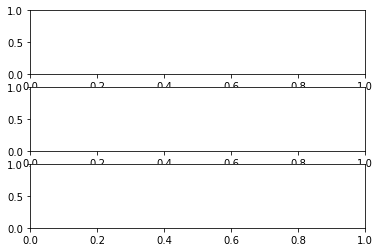

In [54]:
    fig, axs = plt.subplots(3, 1)
    for i_plot in range(0, data.shape[0]):
        params = ML_param[i_plot]
        axs[i_plot].grid(True, color = "grey", linewidth = "1.4", linestyle = "-.")
        axs[i_plot].hist(data[i_plot, :], bins=20, density=True)
        axs[i_plot].set_axisbelow(True)
        axs[i_plot].set_xlabel('data')
        axs[i_plot].set_ylabel('probability density')
        x = np.linspace(min(data[i_plot, :]), max(data[i_plot, :]), num=100)
        if not np.isscalar(params):
            axs[i_plot].plot(x, 1/(params[1]*np.sqrt(2*np.pi))*np.e**(-.5*(-(params[0]-x)/params[1])**2))
        else:
            axs[i_plot].plot(x, params*np.e**(-params*x))
    fig.tight_layout()
    fig.set_size_inches(8, 7)
    plt.subplots_adjust(hspace=0.3)

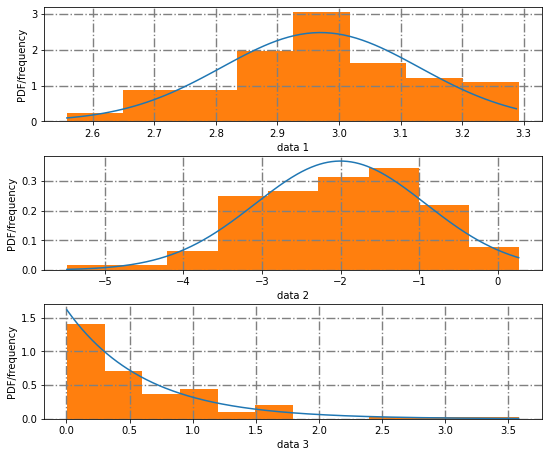

In [71]:
fig, axs = plt.subplots(3, 1)


x_axis = np.arange(min(data1),max(data1),0.01)
axs[0].plot(x_axis,stats.norm.pdf(x_axis,ML_param_1[0],np.sqrt(ML_param_1[1])))
axs[0].hist(data1,density=True,bins="auto")
axs[0].set_xlabel("data 1")
axs[0].set_ylabel("PDF/frequency")
#axs[0].set_title("Histogram of data 1 with corresponding PDF")
axs[0].grid(True, color = "grey", linewidth = "1.4", linestyle = "-.")


x_axis = np.arange(min(data2),max(data2),0.01)
axs[1].plot(x_axis,stats.norm.pdf(x_axis,ML_param_2[0],np.sqrt(ML_param_2[1])))
axs[1].hist(data2,density=True,bins="auto")
axs[1].set_xlabel("data 2")
axs[1].set_ylabel("PDF/frequency")
#axs[0].set_title("Histogram of data 1 with corresponding PDF")
axs[1].grid(True, color = "grey", linewidth = "1.4", linestyle = "-.")


x_axis = np.arange(min(data3),max(data3),0.01)
axs[2].plot(x_axis,ML_param_3[0]*np.exp(-1*ML_param_3[0]*x_axis))
axs[2].hist(data3,density=True,bins="auto")
axs[2].set_xlabel("data 3")
axs[2].set_ylabel("PDF/frequency")
#axs[0].set_title("Histogram of data 1 with corresponding PDF")
axs[2].grid(True, color = "grey", linewidth = "1.4", linestyle = "-.")

fig.tight_layout()
fig.set_size_inches(8, 7)
plt.subplots_adjust(hspace=0.3)
plt.savefig("pdf_freq.pdf")

Posterior mu: [2.96928031]
 Posterior var: [0.0002586]
Posterior mu: [-1.97245319]
 Posterior var: [0.01167873]


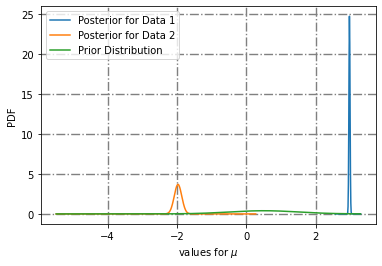

In [75]:
mu_ML = ML_param_1[0]
sigma_sq_true = ML_param_1[1]
posterior_param_i = posterior_mean_Gauss(datai,mu_prior,mu_ML,sigma_sq_prior,sigma_sq_true)

mu_ML = ML_param_2[0]
sigma_sq_true = ML_param_2[1]
posterior_param_j = posterior_mean_Gauss(dataj,mu_prior,mu_ML,sigma_sq_prior,sigma_sq_true)

fig7 = plt.figure("Figure 2")

x_axis_1 = np.arange(min(data1),max(data1),0.01)
x_axis_2 = np.arange(min(data2),max(data2),0.01)
x_axis_prior = np.arange(min(np.append(data1,data2)),max(np.append(data1,data2)),0.01)

plt.plot(x_axis_1,stats.norm.pdf(x_axis_1,posterior_param_i[0],np.sqrt(posterior_param_i[1])))

plt.plot(x_axis_2,stats.norm.pdf(x_axis_2,posterior_param_j[0],np.sqrt(posterior_param_j[1])))

plt.plot(x_axis_prior,stats.norm.pdf(x_axis_prior,mu_prior,np.sqrt(sigma_sq_prior)))
plt.legend(["Posterior for Data 1","Posterior for Data 2","Prior Distribution"])
plt.xlabel("values for $\mu$")
plt.ylabel("PDF")
plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.")
plt.savefig("post_prior.pdf")
plt.show()


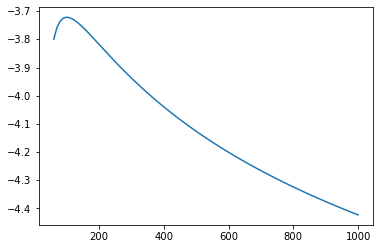

4

In [101]:
import numpy as np
import matplotlib.pyplot as plt
l = np.linspace(60,1000,100)

#ml = np.log(1/(np.sqrt(2*np.pi*l)))-(1/l)
#ml = np.log(1/(np.sqrt(2*np.pi*l)))-400/(l)
ml = -0.5*np.log(2*np.pi*l) -100/(2*l)

plt.plot(l,ml)
plt.show()
np.argmax(ml)

In [79]:
np.argmax(ml)

99